7939072
108.076126
39.061382
13.130453
71.89866
124.05957
10.556168
10.343129
133.94984
61.957687
10.793537
52.93406
63.595013
15.373446
87.58211
87.390366
13.349115
73.60018
119.388954
13.036417
31.485102
149.02744
12.135669
10.0501585
118.82576
34.45889
13.106349
13.782834
39.11975
167.96185
78.91152
13.323311
9.23873
108.609024
166.8407
12.899637
14.501995
91.47533
141.48875
12.525147
13.912426
97.67841
136.8023
13.783334
15.8122
28.462585
166.29388
33.10585
13.646712
13.000408
150.84218
69.322426
9.383514
35.18426
108.88554
20.492699
15.6075735
14.055782
14.742245
12.34542
11.639138
15.804354
33.84152
142.5114
20.176191
54.097916
170.66682
55.034264
13.089365
50.147507
165.59036
34.236507
11.772471
81.745285
112.94356
15.938594
15.546123
125.611046
11.946349
50.738594
160.9101
173.32213
12.648413
23.850271
166.31789
213.03703
12.507392
19.72483
151.8531
110.05413
16.13916
39.941044
268.89575
324.73715
12.232721
17.562857
140.61578
38.66356
14.262471
27.096643
185.90692
124.13084
11

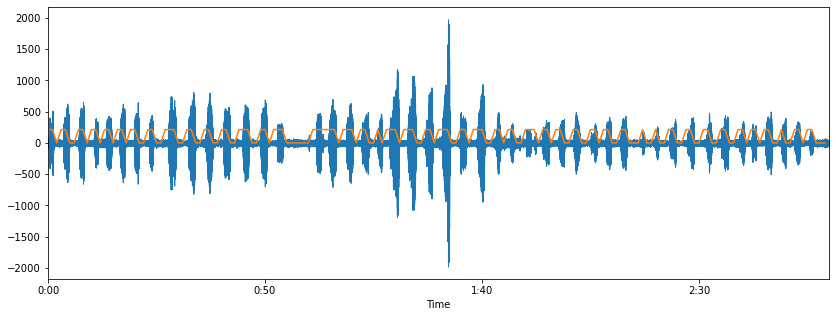

213.87978


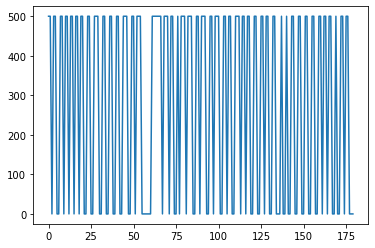

In [36]:
# Load .m4a
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
import os
import numpy as np
import torchaudio

# print(os.getcwd())
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1631119510605_NA\1631119510605_48.m4a'
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_80.m4a'
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620055140118_ASUS_I002D\1620055140118_ASUS_I002D_94.m4a'
x = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
x = np.float32(np.array(x))
print(len(x))
# x = x[6000000:]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, 44100)

def audio_thresholding(x):
    x = np.abs(x)
    sr = 44100
    sec = 1
    count_range = sr*sec
    amp_th = 20
    whether_snore = []
    time_th = 1
    for t in range(0, len(x)-count_range, count_range):
        print(np.mean(x[t:t+count_range]))
        if np.mean(x[t:t+count_range]) > amp_th:
            whether_snore.append(1)
        else:
            whether_snore.append(0)
    for idx, s in enumerate(whether_snore):
        start = 0 if idx-time_th < 0 else idx - time_th
        end =  len(whether_snore)-1 if idx+time_th > len(whether_snore)-1 else idx + time_th
        if np.mean(whether_snore[start:end]) > 0.5:
            whether_snore[idx] = 1

    final = np.mean(x[x>100])*np.array(whether_snore)
    print(final.shape)
    plt.plot(final)
    plt.show()
    print(np.mean(x[x>100]))
    plt.figure()
    plt.plot(500*np.array(whether_snore))
    plt.show()

audio_thresholding(x)



1598482996718_71.m4a
79.87211
53.136463
53.95306
145.66766
56.99025
53.29628
134.22313
77.803535
54.213017
81.85687
116.377144
62.423946
58.462402
130.543
49.693016
51.524445
128.60834
57.51433
58.199093
98.48313
60.091835
61.638683
121.17034
52.079773
53.22136
61.5244
50.563675
57.3717
156.28418
83.59669
52.755737
74.20277
105.11329
58.06798
56.482086
187.03107
54.066895
55.51079
101.105034
107.859184
55.972427
56.387436
167.15524
59.8761
51.442493
101.737915
65.705894
55.187393
77.45048
56.28916
57.876053
100.29787
53.29678
58.13288
101.0727
120.967026
54.60753
54.53442
113.934555
51.24789
52.55211
73.795784
72.78027
56.482403
61.965805
130.66676
51.425034
49.958275
73.27465
122.73279
51.21161
59.88526
136.99883
52.18603
54.049297
151.00163
61.023445
51.2995
171.59088
73.48508
53.40018
96.36934
152.33868
54.13406
65.10322
109.06703
58.346302
55.81238
153.30603
51.486576
51.7751
103.424675
77.81637
66.681816
73.708435
71.7834
54.023266
136.61397
104.44966
49.519276
92.02027
102.27419


IndexError: list index out of range

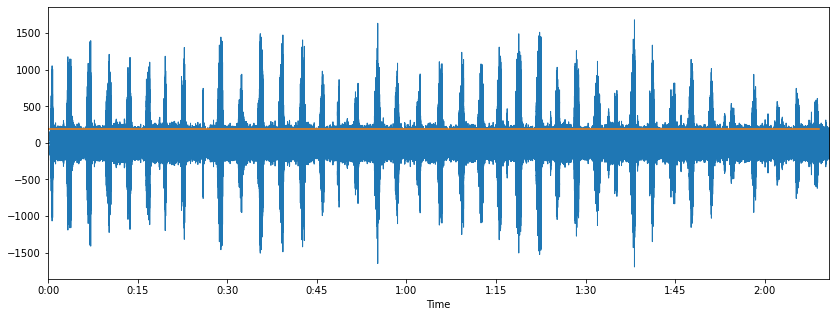

In [40]:
# Load .m4a
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
import os
import numpy as np
import torchaudio

# print(os.getcwd())
filename = rf'C:\Users\test\Downloads\0916\test'
os.chdir(filename)
for f in os.listdir(filename):
    print(f)
    x = AudioSegment.from_file(f, format='m4a').get_array_of_samples()
    x = np.float32(np.array(x))
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, 44100)

    audio_thresholding(x)
    

def audio_thresholding(x):
    x = np.abs(x)
    sr = 44100
    sec = 1
    count_range = sr*sec
    amp_th = 20
    whether_snore = []
    time_th = 1
    for t in range(0, len(x)-count_range, count_range):
        if np.mean(x[t:t+count_range]) > amp_th:
            whether_snore.append(1)
        else:
            whether_snore.append(0)
    for idx, s in enumerate(whether_snore):
        start = 0 if idx-time_th < 0 else idx - time_th
        end =  len(whether_snore)-1 if idx+time_th > len(whether_snore)-1 else idx + time_th
        if np.mean(whether_snore[start:end]) > 0.5:
            whether_snore[idx] = 1

    final = np.mean(x[x>100])*np.array(whether_snore)
    plt.plot(final)
    plt.savefig(f.replace('m4a', 'png'))


C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_6.wav


C:\Users\test\anaconda3\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:433: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


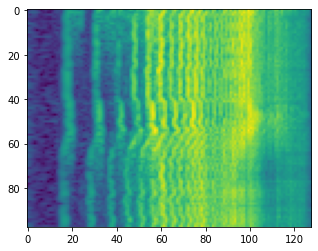

In [2]:
# Show data in MFCC
import torchaudio
import matplotlib.pyplot as plt

filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_6.wav'
print(filename)
waveform, sample_rate = torchaudio.load(filename)
spectrogram = torchaudio.transforms.MelSpectrogram()
spec = spectrogram(waveform)
torchaudio.transforms.MFCC()
fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sample_rate, use_energy=False,
                                          window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
plt.imshow(fbank)
plt.show()

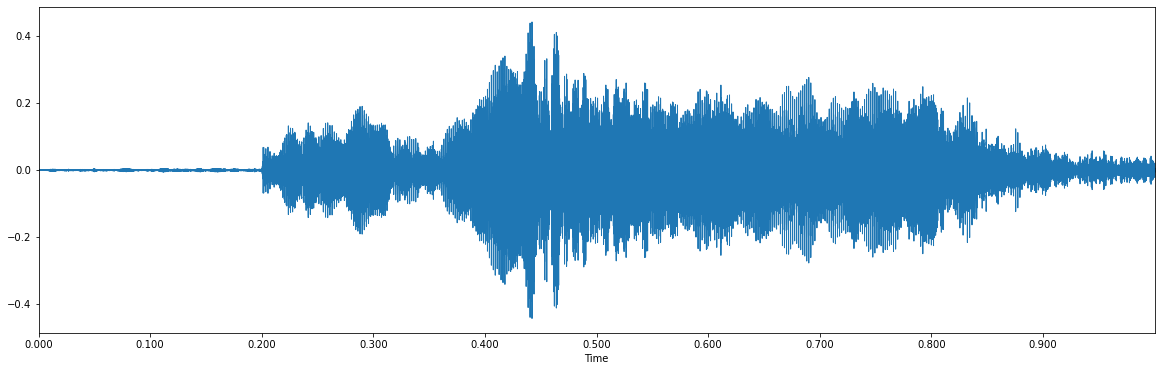

In [3]:
# Load .wav
import matplotlib.pyplot as plt
import librosa.display

filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_0.wav'
x , sr = librosa.load(filename)
plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sr)